## Students Performance Analysis Script

# Life Cycle of Machine Learning Project
- understand the problem statement
- Data Collection
- Data Checks to perform
- Data Pre-Processing
- Model Training
- Choose the best Model 
- Evaluate the Model
- Push the Model


# Problem Statement
- Data Source: Import data from Kaggle
- the data consists of 8 columns and 1000 rows




In [1]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import the CSV file as pandas Dataframe

In [2]:
df = pd.read_csv("students.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# Data Checking 
- check missing values
- check duplicates
- check data type
- check the number of unqiue values in each feature
- statistical summary for numerical features
- statistics for categorical features
- check various categories in categorical features


In [5]:
#checking for missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#checking data types
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [7]:
#checking for duplicate rows
df.duplicated().sum()

0

In [32]:
#checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#check statistical summary
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# insights
- all means are close to each other
- all std are also close to each other
- minumum is math is zero while it is higher in reading and writing 17 and 10


In [9]:
# check unique values (values which are different in number of rows and columns)
for column in df.columns:
    print(f"number of unique values in {column}: {df[column].nunique()}")

number of unique values in gender: 2
number of unique values in race_ethnicity: 5
number of unique values in parental_level_of_education: 6
number of unique values in lunch: 2
number of unique values in test_preparation_course: 2
number of unique values in math_score: 81
number of unique values in reading_score: 72
number of unique values in writing_score: 77


In [48]:
# categories in gender column
print(f"categories in gender variabl are:{df['gender'].unique()}")
print(f"categories in race_ethnicity variabl are:{df['race_ethnicity'].unique()}")
print(f"categories in paerntal level of education variabl are:{df['parental_level_of_education'].unique()}")
print(f"categories in lunch variabl are:{df['lunch'].unique()}")
print(f"categories in test preparation course variabl are:{df['test_preparation_course'].unique()}")
print(f"categories in test preparation course variabl are:{df['writing_score'].unique()}")


categories in gender variabl are:['female' 'male']
categories in race_ethnicity variabl are:['group B' 'group C' 'group A' 'group D' 'group E']
categories in paerntal level of education variabl are:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variabl are:['standard' 'free/reduced']
categories in test preparation course variabl are:['none' 'completed']
categories in test preparation course variabl are:[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  48  42  87  49  10  34  71  37  56  41  22  81  45  36  89  47  90 100
  64  98  51  40  84  69  33  60  85  91  77  27  94  95  19  35  32  96
  97  99  15  30  23]


In [10]:
#define numerical and categorical columns

numerical_cols = [feature for feature in df.columns if df[feature].dtype !='object']
categorical_cols = [feature for feature in df.columns if df[feature].dtype =='object']

print(f"numerical features = {len(numerical_cols), numerical_cols}")
print(f"categorical features = {len(categorical_cols), categorical_cols}")

numerical features = (3, ['math_score', 'reading_score', 'writing_score'])
categorical features = (5, ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])


In [11]:
# adding colomn for total and average score
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


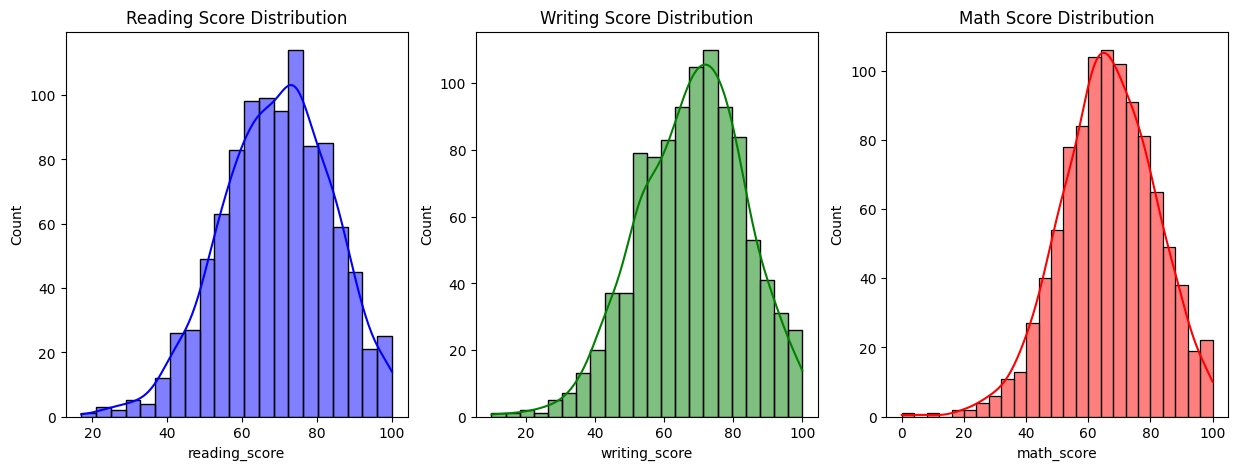

In [12]:
#reading, writing and math score distribution
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
snb.histplot(df['reading_score'],kde=True,color='blue')
plt.title('Reading Score Distribution')
plt.subplot(1,3,2)
snb.histplot(df['writing_score'],kde=True,color='green')
plt.title('Writing Score Distribution')
plt.subplot(1,3,3)
snb.histplot(df['math_score'],kde=True,color='red')
plt.title('Math Score Distribution')
plt.show()

Text(0.5, 1.0, 'Total Score Distribution with respect to Gender')

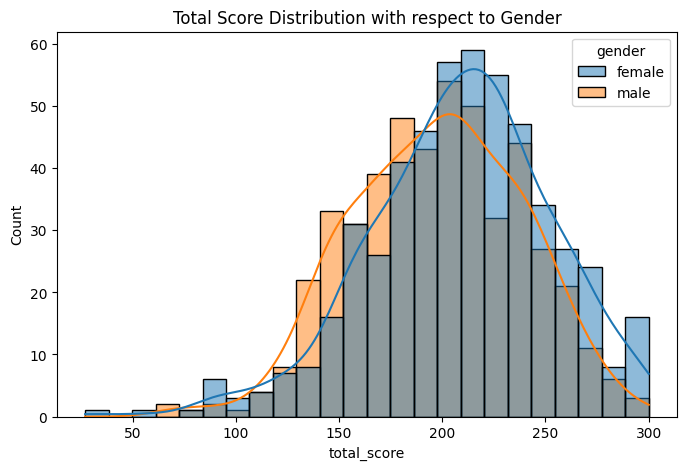

In [61]:
# histogram for total score with respect to gender
plt.figure(figsize=(8,5))
snb.histplot(data=df, x='total_score', hue='gender', kde=True)
plt.title('Total Score Distribution with respect to Gender')

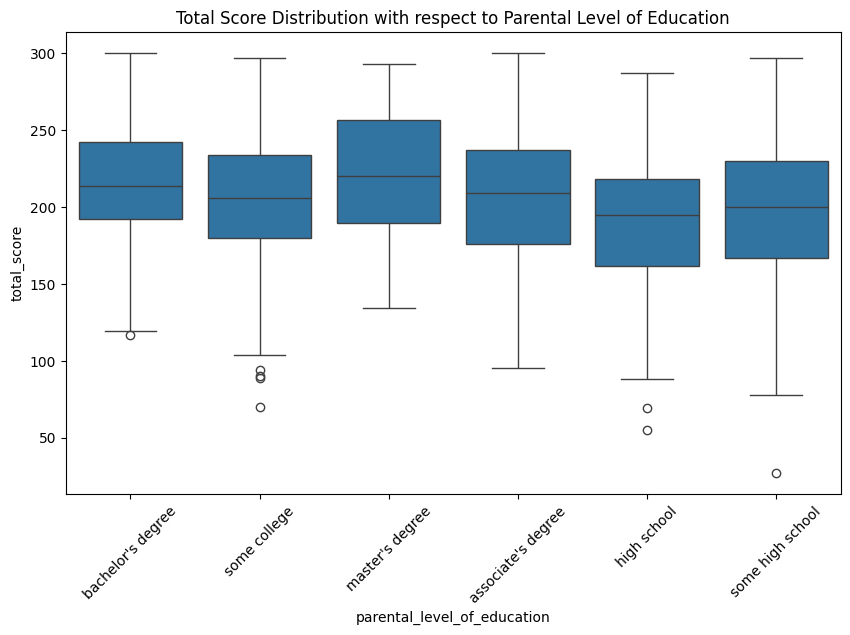

In [13]:
#total score distribution with respect to parental level of education
plt.figure(figsize=(10,6))
snb.boxplot(data=df, x='parental_level_of_education', y='total_score')
plt.title('Total Score Distribution with respect to Parental Level of Education')
plt.xticks(rotation=45)
plt.show()